In [1]:
import os
import time
path='/kaggle/input/graphdataset1/datajson'
l=os.listdir(path)
len(l)

48

In [2]:
l.sort()

In [4]:
import pandas as pd 
frames=[]
for i in range(0,45):
    if 1:
        df=pd.read_json(path+'/'+l[i],orient='records',lines=True)
        frames.append(df)
        print(l[i])
    else:
        break

0.0d0.0.json
0.0d1.0.json
0.0d2.0.json
0.0d3.0.json
0.0d4.0.json
0.0d5.0.json
0.0d6.0.json
0.0d7.0.json
0.0d8.0.json
0.0d9.0.json
1.0d0.0.json
1.0d1.0.json
1.0d2.0.json
1.0d3.0.json
1.0d4.0.json
1.0d5.0.json
1.0d6.0.json
1.0d7.0.json
1.0d8.0.json
1.0d9.0.json
2.0d0.0.json
2.0d1.0.json
2.0d2.0.json
2.0d3.0.json
2.0d4.0.json
2.0d5.0.json
2.0d6.0.json
2.0d7.0.json
2.0d8.0.json
2.0d9.0.json
3.0d0.0.json
3.0d1.0.json
3.0d2.0.json
3.0d3.0.json
3.0d4.0.json
3.0d5.0.json
3.0d6.0.json
3.0d7.0.json
3.0d8.0.json
3.0d9.0.json
4.0d0.0.json
4.0d1.0.json
4.0d2.0.json
4.0d3.0.json
4.0d4.0.json


In [5]:
df=pd.concat(frames,axis=0)

In [6]:
df.head()

,id,title,year,n_citation,abstract,authors,references
0,53e99784b7602d9701f3ffdd,Flow.,2006,15,,"[{'id': '53f43776dabfaee0d9b6e75b', 'name': 'M...",None
1,53e99785b7602d9701f41492,Dancing,1998,0,,"[{'id': '53f42e86dabfaee43ebd375a', 'name': 'A...",None
2,53e99785b7602d9701f414a7,Documentation,1972,3,,"[{'id': '53f4671bdabfaeee22a56233', 'name': 'G...",None
3,53e99785b7602d9701f414a8,Datennetze,1993,0,,"[{'id': '53f4d423dabfaeedd9781e23', 'name': 'O...",None
4,53e99785b7602d9701f414cb,Drift,2004,0,,"[{'id': '53f433e6dabfaeee229920b6', 'name': 'J...",None


In [7]:
df.shape

(4499999, 7)

In [8]:
condition = df['abstract'].apply(lambda x: x=='')
df = df[~condition].copy()


In [9]:
df.shape

(3810903, 7)

In [10]:
import networkx as nx
G = nx.Graph()

In [11]:
for i in df['id']:
    G.add_node(i)

In [12]:
for i in df.iterrows():
    if i[1]['references']!=None:
        for j in i[1]['references']:
                G.add_edge(i[1]['id'],j)

In [13]:
G.number_of_edges(),G.number_of_nodes()-df.shape[0]

(29787382, 229192)

In [14]:
import random

random_items = random.sample(list(G.nodes()), 15)

print(random_items)

['5dde4b1e3a55ac4a36003c85', '55703dc52401b4b38c239dc8', '53e99e13b7602d97026d56b0', '53e9ade9b7602d97037f1d5d', '573697346e3b12023e6252d1', '558ae6c3e4b031bae1fa5bd7', '5550447d45ce0a409eb4e3f6', '5a4aef1617c44a2190f7466d', '53e9b469b7602d9703f6c2c8', '53e9aa95b7602d970340bc5c', '5b67b49517c44aac1c865324', '53e9aab0b7602d970342e936', '53e9bc36b7602d97048a6ab0', '55465ea40cf2939c2feebdbc', '53e9ba28b7602d9704635733']


In [15]:
import networkx as nx
def hop_neighbour(node,k):
    k_hop_neighborhood = nx.single_source_shortest_path_length(G, node, cutoff=k)

    k_hop_nodes = list(k_hop_neighborhood.keys())
    return k_hop_nodes

In [16]:
import networkx as nx

def k_hop_subgraph(G, node, k):
    # Find nodes within k hops
    k_hop_neighborhood = nx.single_source_shortest_path_length(G, node, cutoff=k)
    k_hop_nodes = list(k_hop_neighborhood.keys())
    
    # Create subgraph from these nodes
    subgraph = G.subgraph(k_hop_nodes)
    
    return subgraph

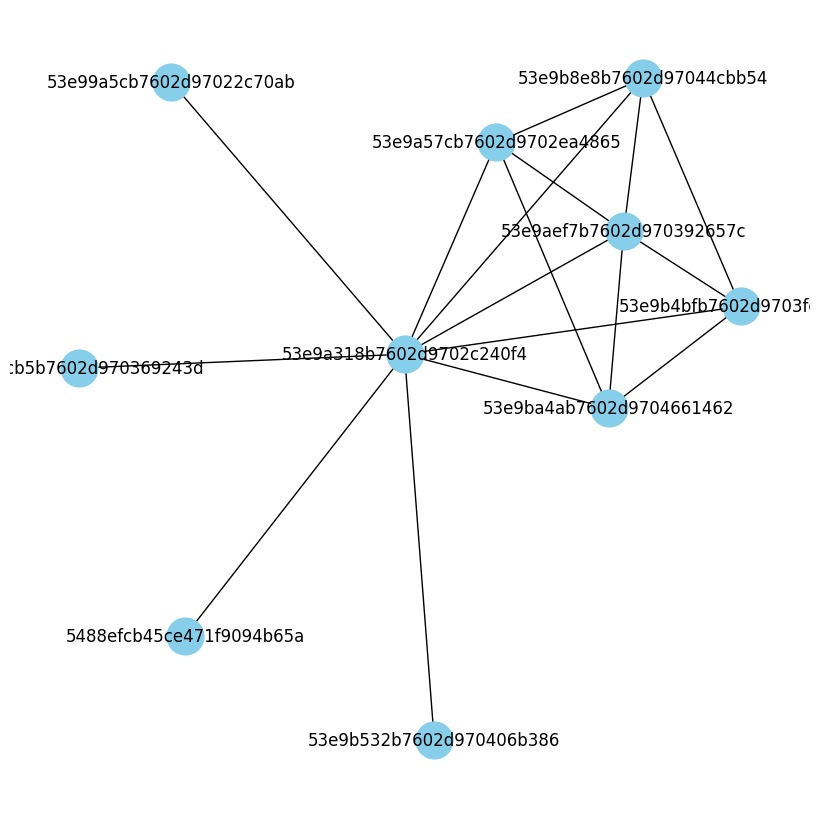

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random
subgraph =k_hop_subgraph(G,'53e9a318b7602d9702c240f4',1)
plt.figure(figsize=(8, 8))  # Set the figure size as needed
nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
plt.show()

In [30]:
    hopes=pd.Series(hop_neighbour('53e9a318b7602d9702c240f4' ,3))


In [32]:
df1 = df[df['id'].isin(hopes)]

In [33]:
df1.shape

(5939, 7)

In [114]:
true_count = sum(condition1)
print(true_count)

5939


In [35]:
import numpy as np
import gc



for i in random_items:
    hopes=pd.Series(hop_neighbour(i,4))
    if(hopes.shape[0]>50000 and hopes.shape[0]<500000):
        df1 = df[df['id'].isin(hopes)]
        df1.to_json(i+'.json',orient='records',lines=True)
        del df1  

        print(hopes.shape)


(100910,)
(278162,)
(405377,)
(75639,)


In [36]:
import numpy as np

for i in random_items:
    hopes=pd.Series(hop_neighbour(i,4))
    print(hopes.shape)
    #df1 = df[df['id'].isin(hopes)]
    
    #df1.to_json(i+'.json',orient='records',lines=True)

(2,)
(1010,)
(100910,)
(752842,)
(278162,)
(706918,)
(405377,)
(1,)
(661498,)
(75639,)
(1198718,)
(1187096,)
(663058,)
(881421,)
(1102313,)


In [28]:
len(hop_neighbour(random_items[0],1))

75

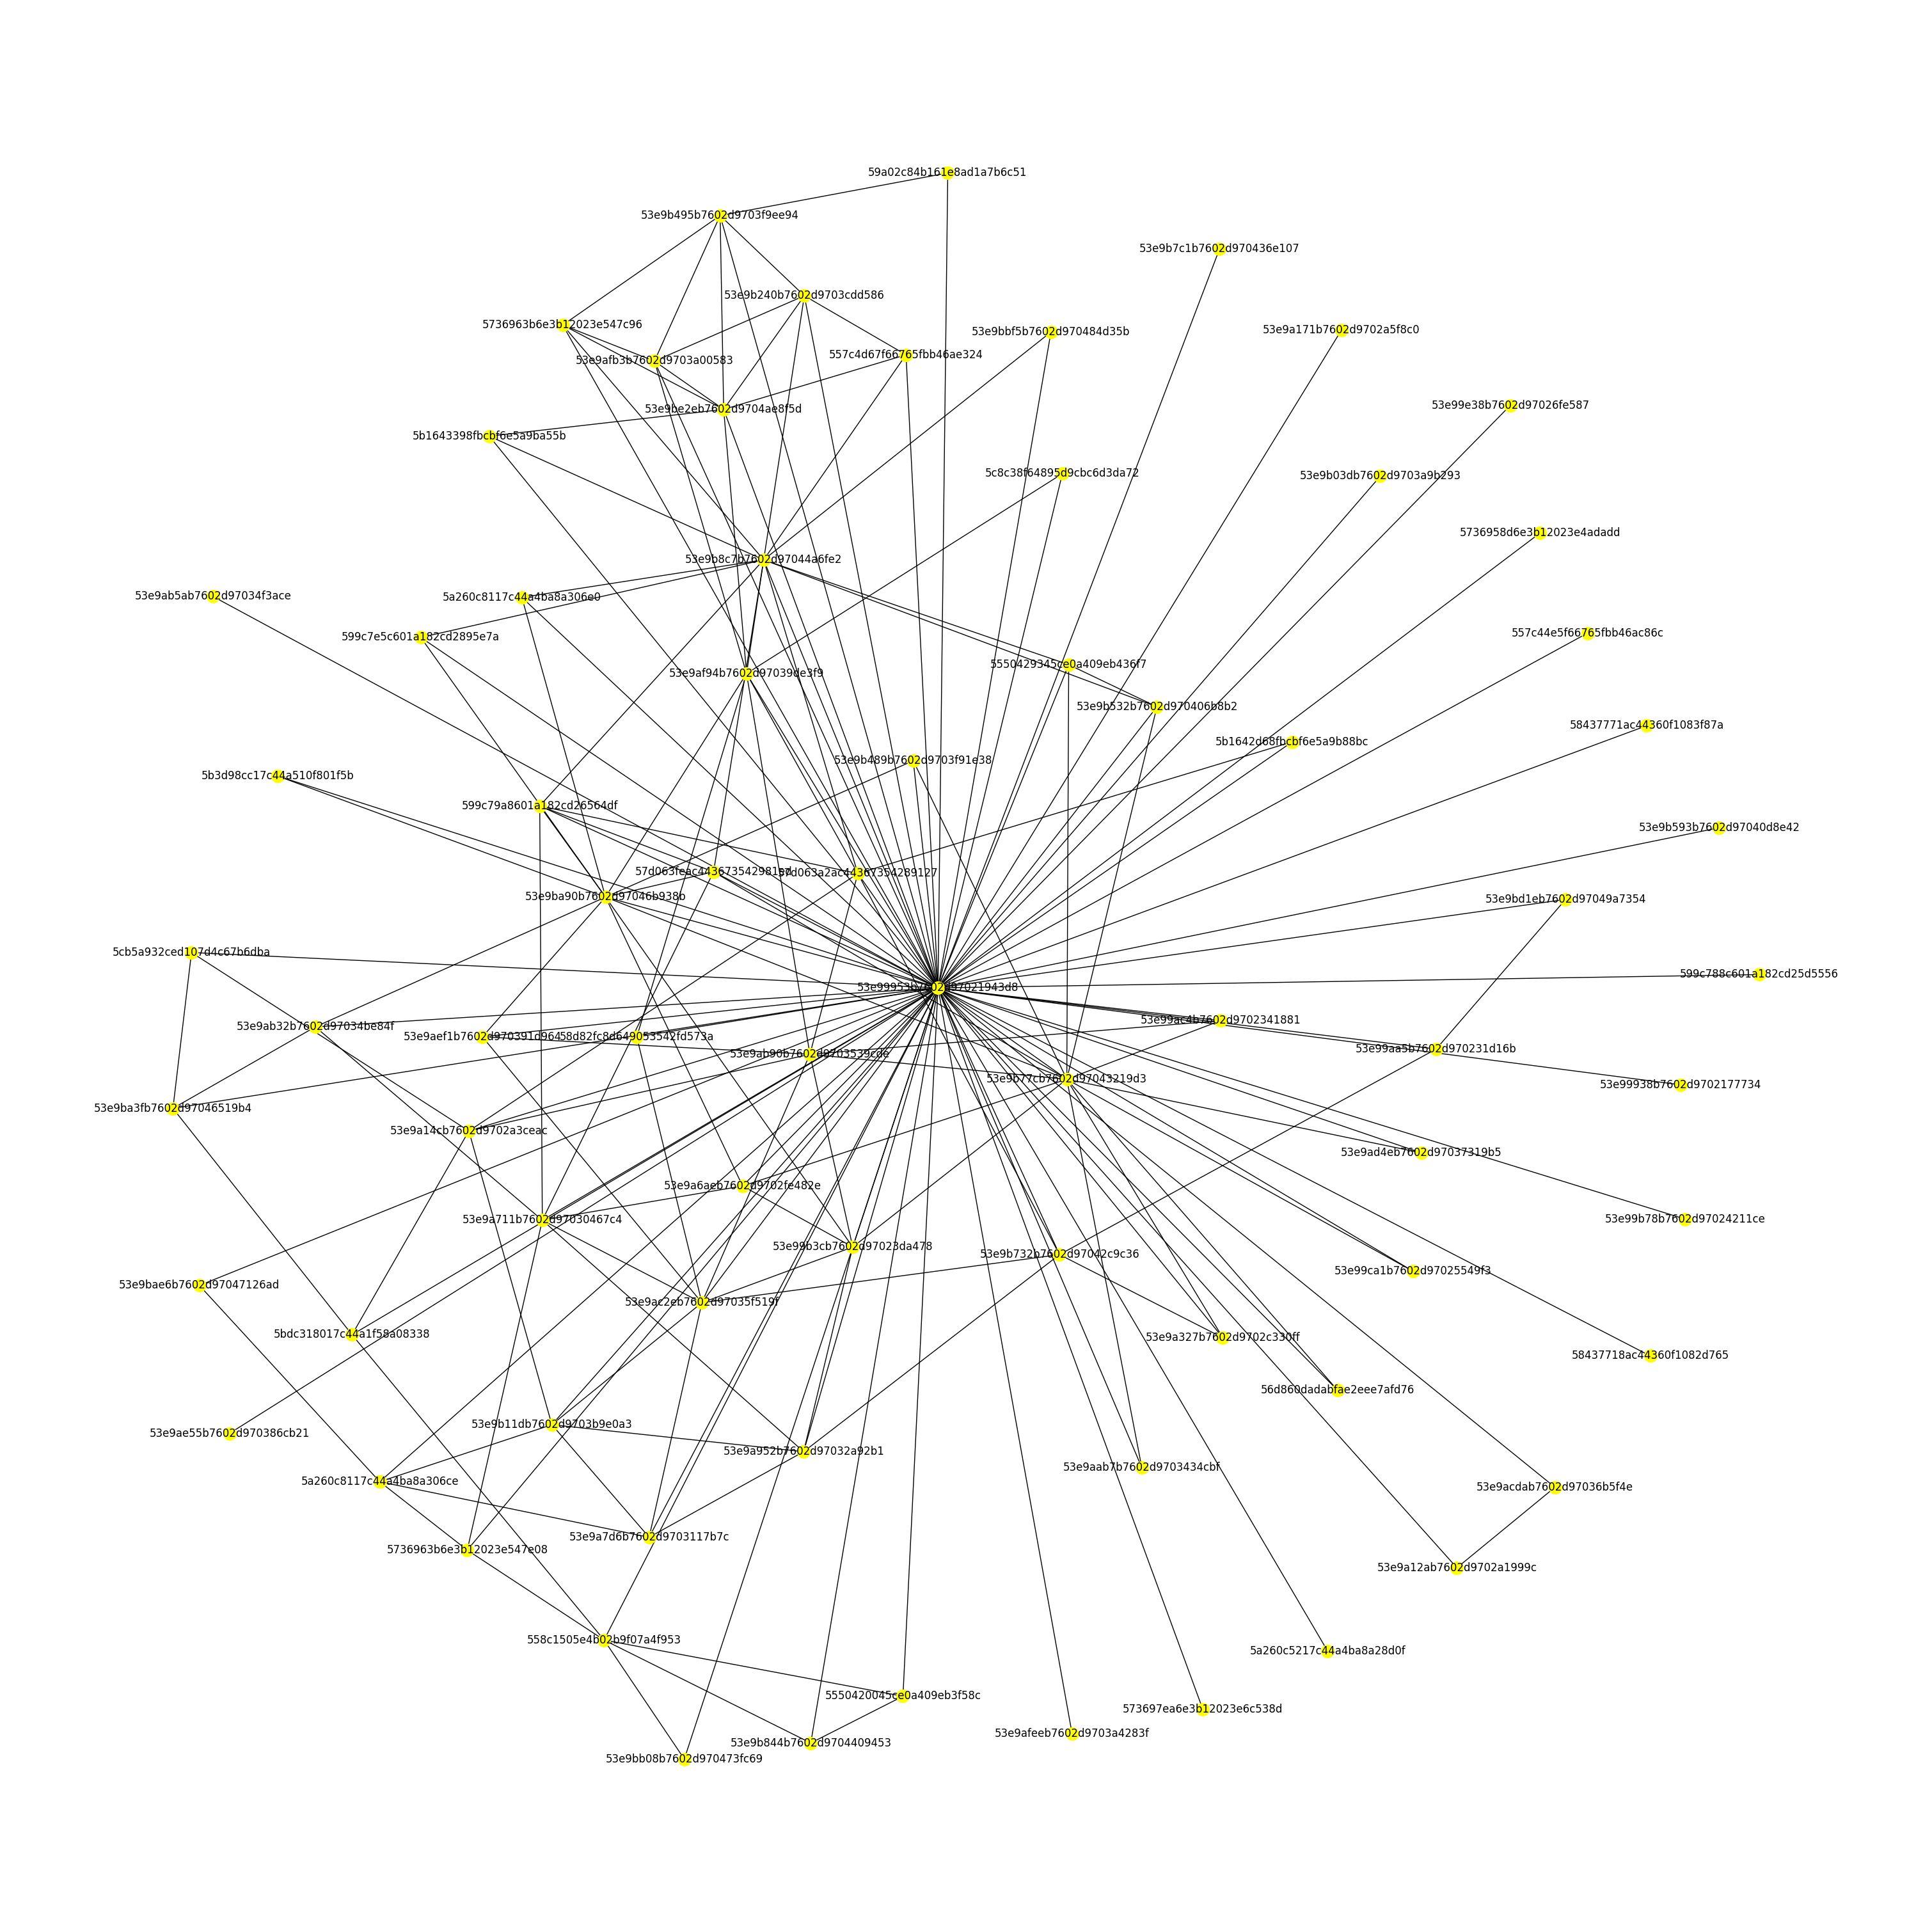

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import random
subgraph =k_hop_subgraph(G,random_items[0],1)
plt.figure(figsize=(30, 30))  # Set the figure size as needed
nx.draw(subgraph, with_labels=True, node_color='yellow', node_size=200, edge_color='k')
plt.show()

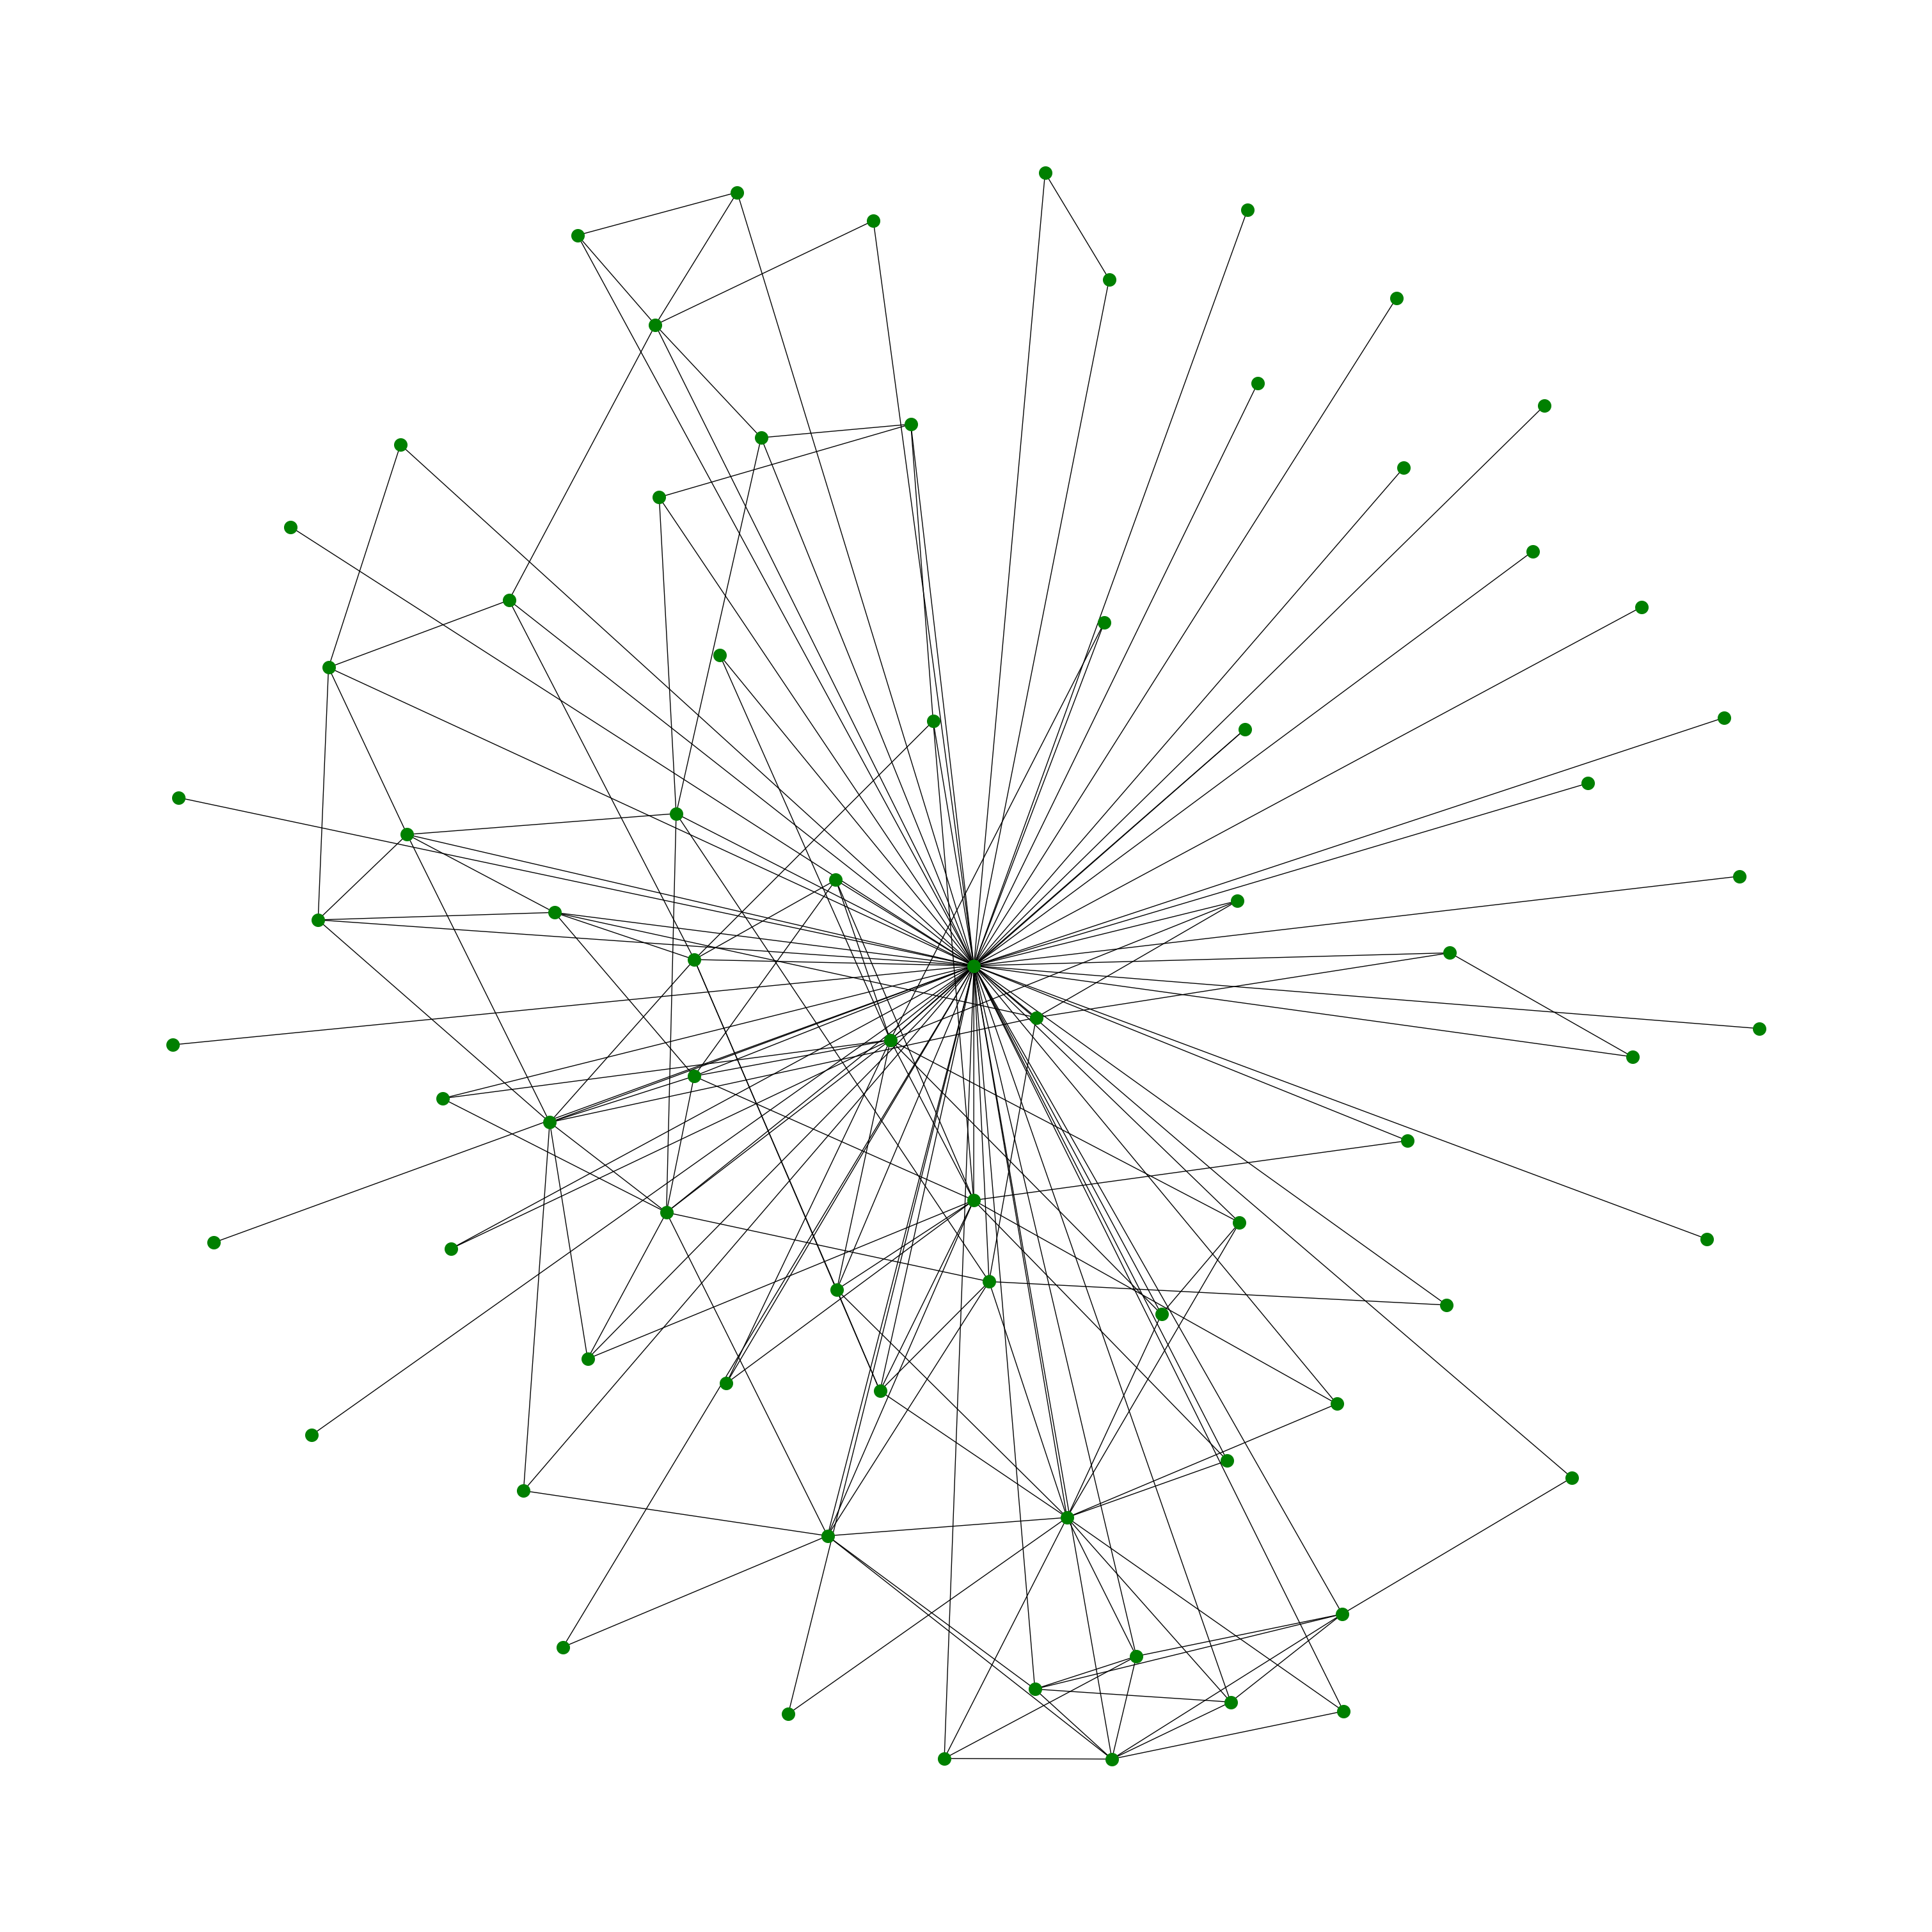

In [34]:
plt.figure(figsize=(30, 30))  
nx.draw(subgraph, node_color='green', node_size=200, edge_color='k')
plt.show()

In [ ]:
import numpy as np

for i in random_items:
    hopes=pd.Series(hop_neighbour(i,3))
    condition1 = pd.Series([False] * len(df))
    condition1_updated = hopes.isin(df['id']).groupby(level=0).any()
    condition1 = condition1 | condition1_updated
    condition1 = condition1.reindex(df.index, fill_value=False)
    df1=df[condition1]
    print(i,df1.shape)   
    df1.to_json(i+'.json',orient='records',lines=True)

58437771ac44360f1083f884 (486936, 7)
53e9b289b7602d9703d2f6ea (516036, 7)
5a260c0217c44a4ba8a1c9f6 (42, 7)


In [1]:
import pandas as pd
df = pd.read_json('/kaggle/working/58437771ac44360f1083f884.json',orient='records',lines=True)

In [2]:
df.head()

,id,title,year,n_citation,abstract,authors,references
0,53e99785b7602d9701f4283f,Express,2013,656,The story is a sequel of a famous Japanese sto...,"[{'id': '53f47148dabfaec09f269c9e', 'name': 'K...",None
1,53e99785b7602d9701f43f95,Bookshelf,2004,0,Reviewed: Succeeding with Open Source Quality ...,"[{'id': '53f4c61fdabfaee57b77b3cf', 'name': 'T...",None
2,53e9978ab7602d9701f45877,Cherries,2009,0,"Through a custom-created particle system, this...","[{'id': '53f45c8ddabfaeb22f517906', 'name': 'C...",None
3,53e9978ab7602d9701f459c6,Concurrency,1975,28,A relation of concurrency can be defined in ev...,"[{'id': '53f4612adabfaeee22a40808', 'name': 'C...",None
4,53e9978ab7602d9701f45923,Clouds,2013,2345,Clouds is an imaginative narrative of a young ...,"[{'id': '53f474d7dabfaee0d9c6706d', 'name': 'N...",None


In [38]:
import os
import time
path='/kaggle/working/'
files=os.listdir(path)
len(files)

7

In [39]:
import zipfile
import os

def create_zip(zip_filename, files_to_zip):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for file in files_to_zip:
            zipf.write(file, os.path.basename(file))
    print(f"{zip_filename} created successfully.")

# Example usage
zip_filename = 'example.zip'
create_zip(zip_filename, files)


example.zip created successfully.


In [6]:
!pip install -U -q PyDrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os

# List files in a specific directory
drive_path = '/content/drive/My Drive/'
os.listdir(drive_path)
